<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/GradientBoostingRegressionAndClassificationFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MSE error  4.8921702075346814e-33


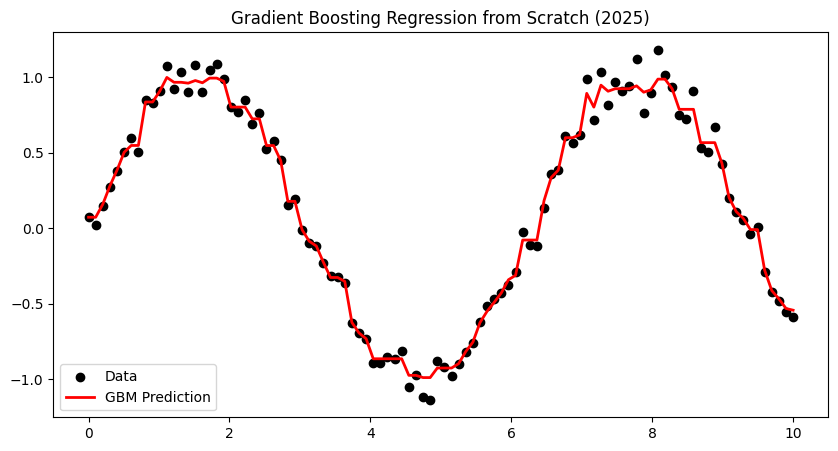

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

class SimpleGradientBooster:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_pred = None

    def fit(self, X, y):
        # 1. Initialize with the mean
        self.initial_pred = np.mean(y)
        f_m = np.full(y.shape, self.initial_pred)

        for _ in range(self.n_estimators):
            # 2a. Calculate residuals
            residuals = y - f_m

            # 2b. Fit a weak learner to the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # 2c. Update model predictions
            f_m += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        # Start with initial mean prediction
        y_pred = np.full(X.shape[0], self.initial_pred)
        # Add contributions from all trees
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

    def mse(self, y, predictions):
      return np.mean(y - predictions) ** 2

# --- Visualization Code ---
# Generate non-linear mock data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, 100)

model = SimpleGradientBooster(n_estimators=50, learning_rate=0.1)
model.fit(X, y)
predictions = model.predict(X)

pr = model.mse(y, predictions)
print('MSE error ', pr)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, predictions, color='red', linewidth=2, label='GBM Prediction')
plt.title('Gradient Boosting Regression from Scratch (2025)')
plt.legend()
plt.show()

 Accuracy: 100.00%


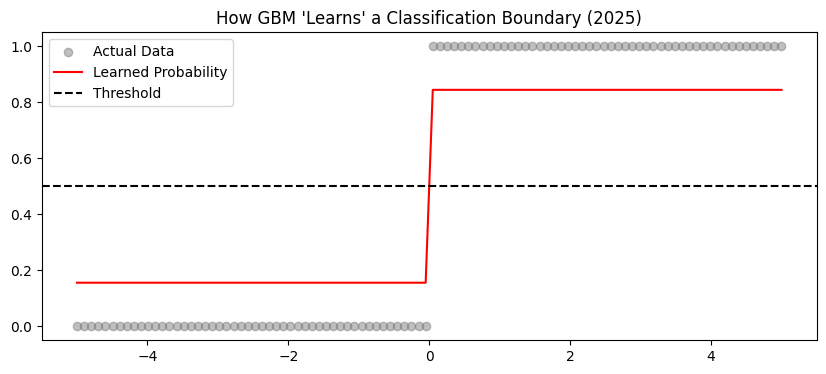

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

class GBClassifier:
    def __init__(self, n_trees=10, lr=0.1):
        self.n_trees = n_trees
        self.lr = lr
        self.trees = []
        self.base_pred = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        # 1. Initial log-odds baseline
        p_avg = np.mean(y)
        self.base_pred = np.log(p_avg / (1 - p_avg))

        # Current predictions in log-odds space
        f_m = np.full(y.shape, self.base_pred)

        for _ in range(self.n_trees):
            # 2. Compute residuals (Actual - Prob)
            probs = self.sigmoid(f_m)
            residuals = y - probs

            # 3. Fit a tree to those residuals
            tree = DecisionTreeRegressor(max_depth=2)
            tree.fit(X, residuals)

            # 4. Update the score (log-odds)
            f_m += self.lr * tree.predict(X)
            self.trees.append(tree)

    def predict_proba(self, X):
        # Sum baseline + all tree corrections
        f_m = np.full(X.shape[0], self.base_pred)
        for tree in self.trees:
            f_m += self.lr * tree.predict(X)
        return self.sigmoid(f_m)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

# --- Visualization ---
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = (X.ravel() > 0).astype(int) # Simple "0" vs "1" split

model = GBClassifier(n_trees=30, lr=0.2)
model.fit(X, y)
probs = model.predict_proba(X)

# Calculate accuracy by checking equality and taking the mean
y_pred = model.predict(X)
accuracy = np.mean(y_pred == y)

print(f" Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 4))
plt.scatter(X, y, color='gray', alpha=0.5, label='Actual Data')
plt.plot(X, probs, color='red', label='Learned Probability')
plt.axhline(0.5, color='black', linestyle='--', label='Threshold')
plt.title("How GBM 'Learns' a Classification Boundary (2025)")
plt.legend()
plt.show()